## ML Project - Dataset 1 - Spotify

# (a) Exploration

Number of samples: 953
Number of raw features: 25
Fraction of missing values per column:
in_shazam_charts    0.052466
key                 0.099685
dtype: float64
Number of categorical variables: 7
Categorical variables: ['artist_count', 'released_month', 'released_day', 'in_deezer_charts', 'key', 'mode', 'instrumentalness_%']


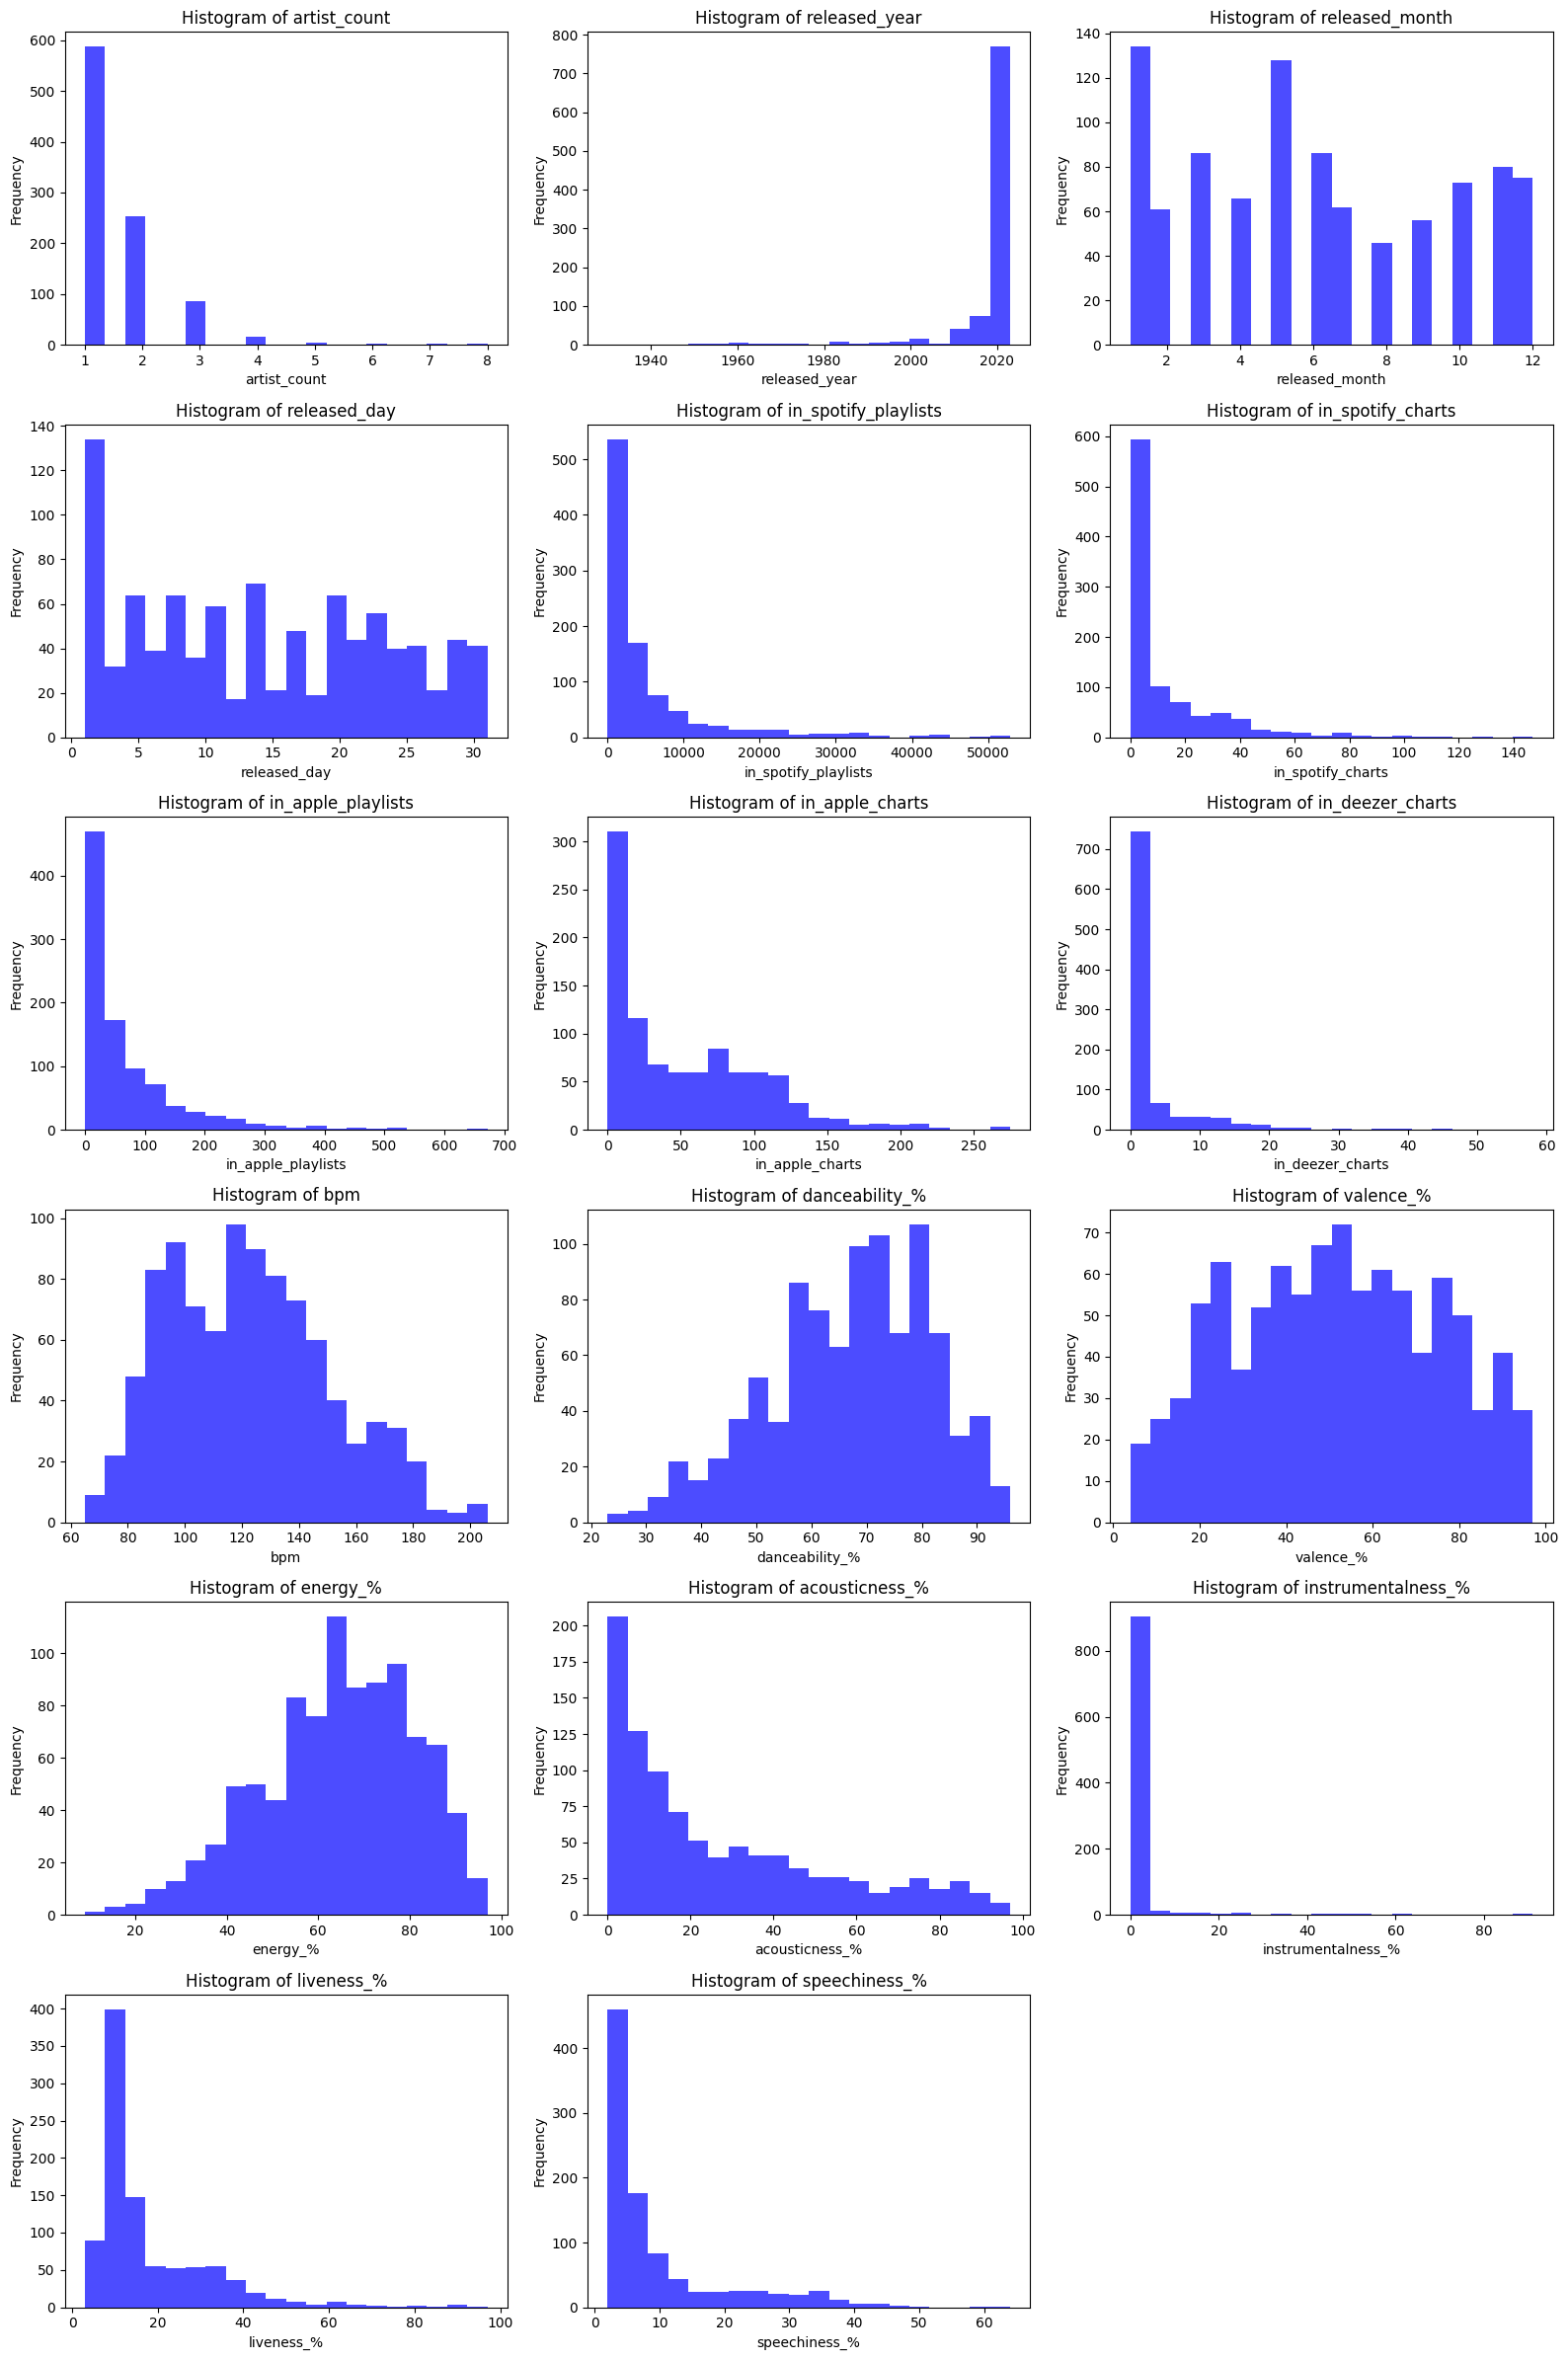

In [235]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

file_path = '/Users/dakshkhetarpaul/Desktop/ML443-Final-Project/Datasets/Spotify Most Streamed Songs.csv'

# Load the data
training_data = pd.read_csv(file_path)

# Number of samples and raw features
num_samples = training_data.shape[0]
num_features = training_data.shape[1]
print(f"Number of samples: {num_samples}")
print(f"Number of raw features: {num_features}")

# Fraction of missing values
missing_values = training_data.isnull().sum() / num_samples
fraction_missing = missing_values[missing_values > 0]
if fraction_missing.empty:
    print("No missing values in the dataset.")
else:
    print("Fraction of missing values per column:")
    print(fraction_missing)

# Identify categorical columns, choosing 20

def find_categorical_columns(dataframe, unique_threshold=40):
    categorical_columns = []
    for column in dataframe.columns:
        unique_values = dataframe[column].nunique()
        if unique_values <= unique_threshold:
            categorical_columns.append(column)
    return categorical_columns


categorical_columns = find_categorical_columns(training_data)
num_categorical = len(categorical_columns)
print(f"Number of categorical variables: {num_categorical}")
print(f"Categorical variables: {categorical_columns}")

# Histograms

numeric_columns = training_data.select_dtypes(include=['number']).columns

# Define the number of histograms per row
cols_per_row = 3
num_cols = len(numeric_columns)

# Calculate the number of rows needed
num_rows = (num_cols + cols_per_row - 1) // cols_per_row  # Equivalent to math.ceil(num_cols / cols_per_row)

# Create a figure for subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(16, num_rows * 4))  # Adjust size as needed
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Plot each histogram
for i, col in enumerate(numeric_columns):
    axes[i].hist(training_data[col], bins=20, alpha=0.7, color='blue')  # Histogram for the current column
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(False)

# Hide any unused subplots
for j in range(len(numeric_columns), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


Based on the above results, the number of samples is 953, we have 25 raw features
Fraction of missing values per column:
in_shazam_charts    0.052466
key                 0.099685
Number of categorical variables: 7
Categorical variables: ['artist_count', 'released_month', 'released_day', 'in_deezer_charts', 'key', 'mode', 'instrumentalness_%'], all these correspond to the histogram observations

It can also be observed from the histograms that majority of songs have a very low values of speechiness,liveness, acousticness.

1 non-numeric or missing values in 'streams' column.


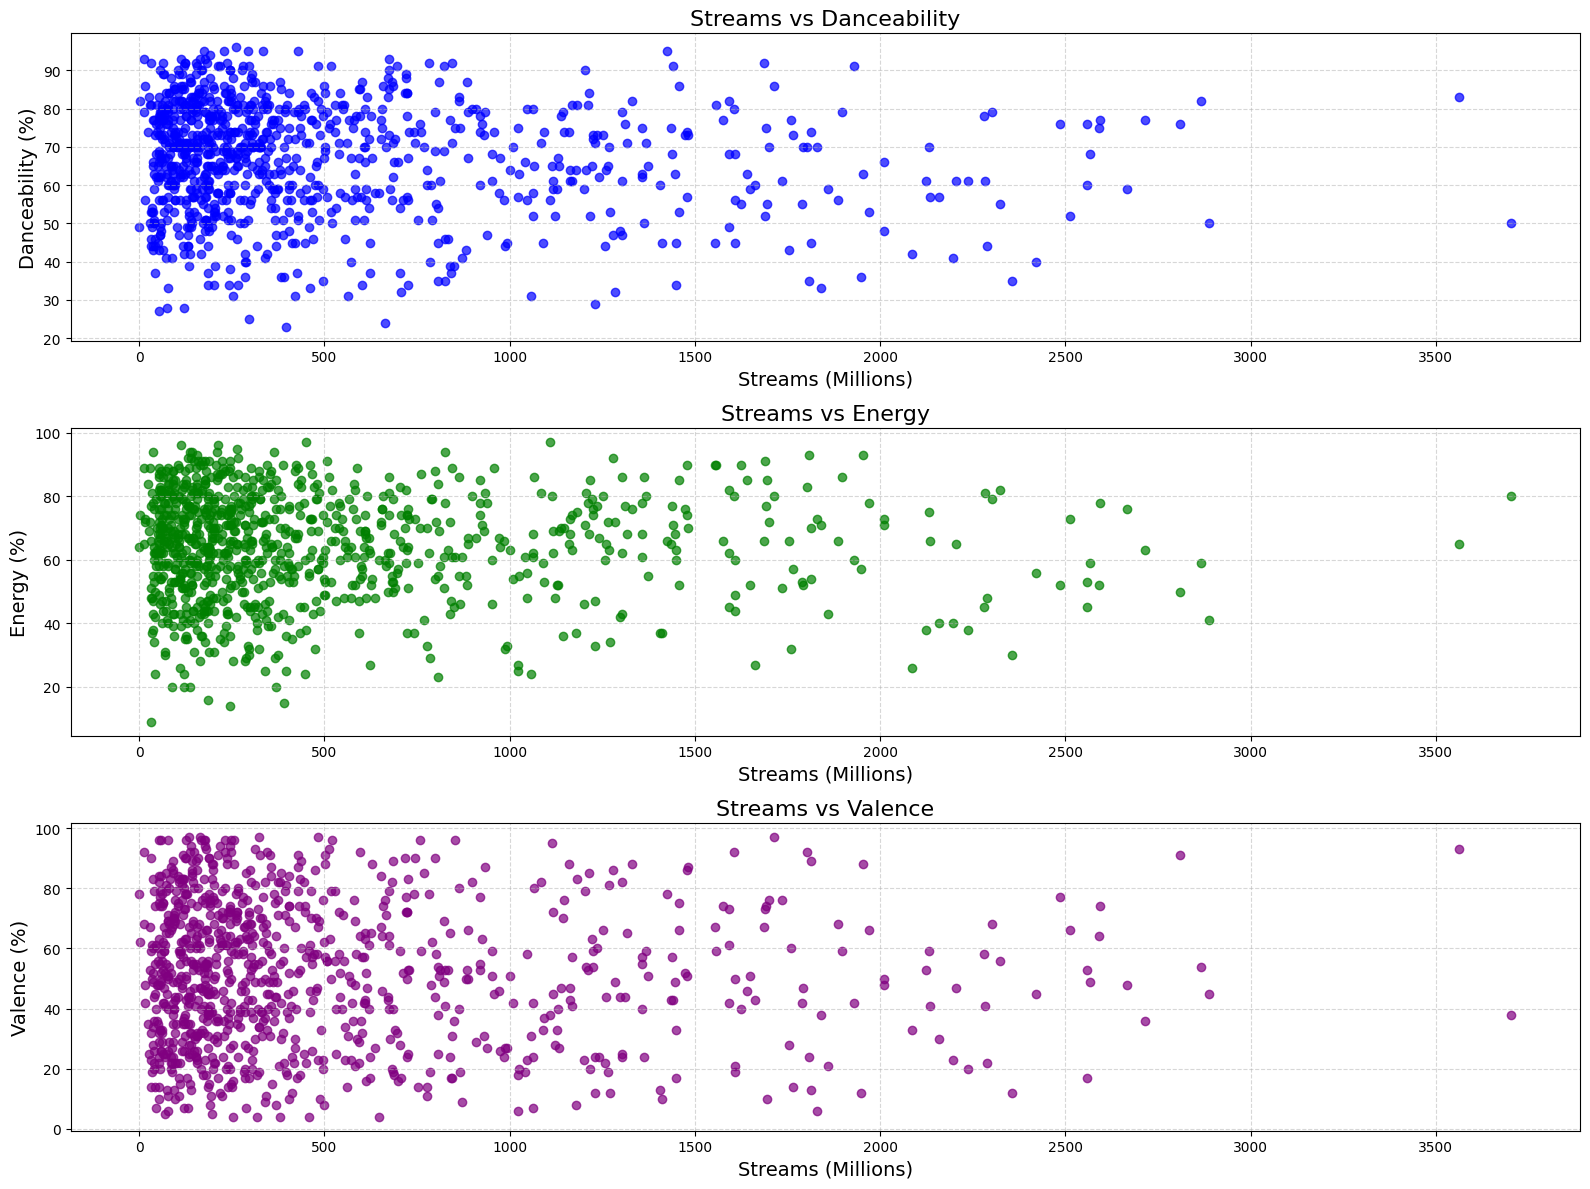

In [236]:
# Check and convert 'streams' to numeric
training_data['streams'] = pd.to_numeric(training_data['streams'], errors='coerce')

# Verify if there are any non-numeric or missing values after conversion
print(training_data['streams'].isnull().sum(), "non-numeric or missing values in 'streams' column.")

# Convert streams to millions for plotting
training_data['streams_millions'] = training_data['streams'] / 1e6

plt.figure(figsize=(16, 12))

# Scatter plot for Streams vs Danceability
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
plt.scatter(training_data['streams_millions'], training_data['danceability_%'], alpha=0.7, color='blue')
plt.title('Streams vs Danceability', fontsize=16)
plt.xlabel('Streams (Millions)', fontsize=14)
plt.ylabel('Danceability (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Scatter plot for Streams vs Energy
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
plt.scatter(training_data['streams_millions'], training_data['energy_%'], alpha=0.7, color='green')
plt.title('Streams vs Energy', fontsize=16)
plt.xlabel('Streams (Millions)', fontsize=14)
plt.ylabel('Energy (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Scatter plot for Streams vs Valence
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
plt.scatter(training_data['streams_millions'], training_data['valence_%'], alpha=0.7, color='purple')
plt.title('Streams vs Valence', fontsize=16)
plt.xlabel('Streams (Millions)', fontsize=14)
plt.ylabel('Valence (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


Here, It can be observed that the majority of songs are having higher values of Danceability and energy, this does correlate to the real world. However in the case of Valence(Higher value means positive/happy song, Lower value means negative/song) there is a proper balance, which indicates personal prefrences vary by people

# (b) Pre-Processing

First we will Split the Training And Testing Data, and then use K fold on the training data

In [237]:
total_data = pd.read_csv(file_path)
from sklearn.model_selection import train_test_split, KFold # train_test_split splits the data in training and testing with shuffle, K fold  takes K as input

#splitting
train_data, test_data = train_test_split(total_data, test_size=0.2, random_state=42, shuffle=True)



print("Training set size:", len(train_data))
print("Testing set size:", len(test_data))

# Set up K-fold cross-validation on the training data
kf = KFold(n_splits=5, shuffle=True, random_state=15) # make sure each time the shuffle is same, shuffle again for more reliable results

# Example usage: iterating through folds
for fold, (train_idx, val_idx) in enumerate(kf.split(train_data)):
    fold_train = train_data.iloc[train_idx]
    fold_val = train_data.iloc[val_idx]
    print(f"Fold {fold+1}:")
    print(" - Training fold size:", len(fold_train))
    print(" - Validation fold size:", len(fold_val))


Training set size: 762
Testing set size: 191
Fold 1:
 - Training fold size: 609
 - Validation fold size: 153
Fold 2:
 - Training fold size: 609
 - Validation fold size: 153
Fold 3:
 - Training fold size: 610
 - Validation fold size: 152
Fold 4:
 - Training fold size: 610
 - Validation fold size: 152
Fold 5:
 - Training fold size: 610
 - Validation fold size: 152


Preprocessing Steps:

1. Convert column to numeric, non-numeric entries become NaN.
2. Replace all negative values with NaN.
3. If the column name ends with %, replace all values > 100 with NaN.
4. Compute the mean from the remaining valid values.
5. Replace all NaNs (including those from non-numeric, negative, or >100 entries) with the mean.
6. For text based columns, replace Nan with "not provided"

In [238]:
excluded_cols = ["track_name", "artist(s)_name", "key", "mode", "cover_url"]
processed_folds = {}

for fold, (train_idx, val_idx) in enumerate(kf.split(train_data)):
    # Create copies to avoid warnings
    fold_train = train_data.iloc[train_idx].copy()
    fold_val = train_data.iloc[val_idx].copy()  
    
    print(f"\n{'='*40}")
    print(f"Processing Fold {fold+1}")
    print(f"{'='*40}")
    
    # Preprocessing the training fold
    for col in fold_train.columns:
        if col not in excluded_cols:
            # Remove commas if column ends with "charts" or "playlists"
            if col.endswith("charts") or col.endswith("playlists"):
                fold_train[col] = fold_train[col].astype(str).str.replace(",", "", regex=True)
            
            # Convert to numeric
            fold_train[col] = pd.to_numeric(fold_train[col], errors='coerce')
            
            # Replace negative values with NaN
            negative_mask = (fold_train[col] < 0)
            negative_count = negative_mask.sum()
            if negative_count > 0:
                fold_train.loc[negative_mask, col] = float('nan')
            
            # If column ends with '%', replace values > 100 with NaN
            above_100_count = 0
            if col.endswith('%'):
                above_100_mask = (fold_train[col] > 100)
                above_100_count = above_100_mask.sum()
                if above_100_count > 0:
                    fold_train.loc[above_100_mask, col] = float('nan')
            
            # Compute mean after replacements
            col_mean = fold_train[col].mean(skipna=True)
            nan_count = fold_train[col].isna().sum()
            
            # Replace NaNs with mean
            if nan_count > 0 and pd.notna(col_mean):
                fold_train[col] = fold_train[col].fillna(col_mean)
            
            # Print summary of changes
            changes = []
            if nan_count > 0:
                changes.append(f"replaced {nan_count} NaN values with mean")
            if negative_count > 0:
                changes.append(f"set {negative_count} negative values to NaN before mean")
            if above_100_count > 0:
                changes.append(f"set {above_100_count} values above 100 to NaN before mean")
            if col.endswith("charts") or col.endswith("playlists"):
                changes.append("removed commas")
            
            if changes:
                print(f"Column '{col}': " + ", ".join(changes) + ".")
                
        else:
            # For excluded columns, replace empty/NaN with "not provided"
            not_provided_count = fold_train[col].isna().sum()
            if not_provided_count > 0:
                fold_train[col] = fold_train[col].fillna("not provided")
                print(f"Column '{col}': replaced {not_provided_count} empty values with 'not provided'.")
    # Preprocessing the validation fold using val's own stats
    for col in fold_val.columns:
        if col not in excluded_cols:
            if col.endswith("charts") or col.endswith("playlists"):
                fold_val[col] = fold_val[col].astype(str).str.replace(",", "", regex=True)
            fold_val[col] = pd.to_numeric(fold_val[col], errors='coerce')

            negative_mask = (fold_val[col] < 0)
            negative_count = negative_mask.sum()
            if negative_count > 0:
                fold_val.loc[negative_mask, col] = float('nan')

            above_100_count = 0
            if col.endswith('%'):
                above_100_mask = (fold_val[col] > 100)
                above_100_count = above_100_mask.sum()
                if above_100_count > 0:
                    fold_val.loc[above_100_mask, col] = float('nan')

            col_mean = fold_val[col].mean(skipna=True)
            nan_count = fold_val[col].isna().sum()
            if nan_count > 0 and pd.notna(col_mean):
                fold_val[col] = fold_val[col].fillna(col_mean)

        else:
            not_provided_count = fold_val[col].isna().sum()
            if not_provided_count > 0:
                fold_val[col] = fold_val[col].fillna("not provided")

    # Also ensure val fold is cleaned similarly if needed:
    #if fold == 0:
        #print("\nFirst 5 rows of the training set after preprocessing (Fold 1):")
        #print(fold_train.head())
        #print("\nFirst 5 rows of the validation set after preprocessing (Fold 1):")
        #print(fold_val.head())

    # Store the processed folds
    processed_folds[fold] = {"train": fold_train, "val": fold_val}



Processing Fold 1
Column 'in_spotify_playlists': removed commas.
Column 'in_spotify_charts': removed commas.
Column 'in_apple_playlists': removed commas.
Column 'in_apple_charts': removed commas.
Column 'in_deezer_playlists': removed commas.
Column 'in_deezer_charts': removed commas.
Column 'in_shazam_charts': replaced 32 NaN values with mean, removed commas.
Column 'key': replaced 62 empty values with 'not provided'.

Processing Fold 2
Column 'in_spotify_playlists': removed commas.
Column 'in_spotify_charts': removed commas.
Column 'streams': replaced 1 NaN values with mean.
Column 'in_apple_playlists': removed commas.
Column 'in_apple_charts': removed commas.
Column 'in_deezer_playlists': removed commas.
Column 'in_deezer_charts': removed commas.
Column 'in_shazam_charts': replaced 36 NaN values with mean, removed commas.
Column 'key': replaced 70 empty values with 'not provided'.

Processing Fold 3
Column 'in_spotify_playlists': removed commas.
Column 'in_spotify_charts': removed c

Here we are One Hot Encoding the Categorical Variables and standardising the features. Features ending with % are not being standardised now because we need the orignal values for the feature engineering and we will standardising them later

In [239]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Update excluded columns if needed
excluded_cols = ["track_name", "artist(s)_name", "cover_url", "released_month", "released_year", "released_day"]
percent_cols = [col for col in fold_train.columns if col.endswith('%')]
excluded_cols.extend(percent_cols)

categorical_cols = ['artist_count', 'key', 'mode']

standardized_folds = {}

for fold in range(len(processed_folds)):
    print(f"\n{'='*40}")
    print(f"Encoding & Standardizing Fold {fold+1}")
    print(f"{'='*40}")
    
    # Retrieve processed fold data
    fold_train = processed_folds[fold]["train"].copy()
    fold_val = processed_folds[fold]["val"].copy()
    
    # Identify numeric columns
    numeric_cols = [col for col in fold_train.columns if col not in excluded_cols + categorical_cols]

    # ---- Encode Categorical Variables ----
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    
    # Fit on training categorical data
    encoded_train = encoder.fit_transform(fold_train[categorical_cols])
    encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
    encoded_train_df = pd.DataFrame(encoded_train, columns=encoded_feature_names, index=fold_train.index)
    
    # Drop original categorical columns and concatenate new encoded columns (train)
    fold_train = pd.concat([fold_train.drop(columns=categorical_cols), encoded_train_df], axis=1)
    
    # Transform validation categorical data with the trained encoder
    encoded_val = encoder.transform(fold_val[categorical_cols])
    encoded_val_df = pd.DataFrame(encoded_val, columns=encoded_feature_names, index=fold_val.index)
    
    # Drop original categorical columns and concatenate new encoded columns (val)
    fold_val = pd.concat([fold_val.drop(columns=categorical_cols), encoded_val_df], axis=1)

    # Standardize Numeric Columns
    scaler = StandardScaler()
    # Fit scaler on training numeric data
    fold_train[numeric_cols] = scaler.fit_transform(fold_train[numeric_cols])
    # Transform val numeric data with the same scaler
    fold_val[numeric_cols] = scaler.transform(fold_val[numeric_cols])

    # Store standardized folds
    standardized_folds[fold] = {"train": fold_train, "val": fold_val}

    print(f"Fold {fold+1}: Encoding and Standardization complete.")
    
    #if fold == 0:
        #print("\nFirst 5 rows of the training set after encoding and standardization (Fold 1):")
        #print(fold_train.head())
        #print("\nFirst 5 rows of the validation set after encoding and standardization (Fold 1):")
        #print(fold_val.head())


print("\nAll folds have been encoded and standardized.")


   



Encoding & Standardizing Fold 1
Fold 1: Encoding and Standardization complete.

Encoding & Standardizing Fold 2
Fold 2: Encoding and Standardization complete.

Encoding & Standardizing Fold 3
Fold 3: Encoding and Standardization complete.

Encoding & Standardizing Fold 4
Fold 4: Encoding and Standardization complete.

Encoding & Standardizing Fold 5
Fold 5: Encoding and Standardization complete.

All folds have been encoded and standardized.


# (c) Feature extraction


The Features are party_val, concert_val, release_, season_. This will make the data processing for ML model easier and reduces the columns and date values for better efficiency

In [240]:
import numpy as np
import pandas as pd

for fold in standardized_folds:
    # Copy the training and validation DataFrames
    fold_train = standardized_folds[fold]["train"].copy()
    fold_val = standardized_folds[fold]["val"].copy()

    # Make sure released_month and released_day are integers if needed
    fold_train['released_month'] = fold_train['released_month'].astype(int)
    fold_val['released_month'] = fold_val['released_month'].astype(int)
    fold_train['released_day'] = fold_train['released_day'].astype(int)
    fold_val['released_day'] = fold_val['released_day'].astype(int)

    # ----- Training Set Feature Engineering -----
    fold_train['concert_val'] = (fold_train['speechiness_%'] + fold_train['liveness_%'] + fold_train['acousticness_%']) / 3.0
    fold_train['party_val'] = (fold_train['danceability_%'] + fold_train['energy_%'] + fold_train['bpm']) / 3.0

    fold_train['release_cat'] = np.where(
        fold_train['released_year'] >= 2022, 1,
        np.where(fold_train['released_year'] >= 2015, 2, 3)
    ).astype(int)

    fold_train['season_val'] = np.where(
        fold_train['released_month'] <= 4, 1,
        np.where(fold_train['released_month'] <= 8, 2, 3)
    ).astype(int)

    # ----- Validation Set Feature Engineering -----
    fold_val['concert_val'] = (fold_val['speechiness_%'] + fold_val['liveness_%'] + fold_val['acousticness_%']) / 3.0
    fold_val['party_val'] = (fold_val['danceability_%'] + fold_val['energy_%'] + fold_val['bpm']) / 3.0

    fold_val['release_cat'] = np.where(
        fold_val['released_year'] >= 2022, 1,
        np.where(fold_val['released_year'] >= 2015, 2, 3)
    ).astype(int)

    fold_val['season_val'] = np.where(
        fold_val['released_month'] <= 4, 1,
        np.where(fold_val['released_month'] <= 8, 2, 3)
    ).astype(int)

    # One-hot encode release_cat, season_val
    fold_train = pd.get_dummies(
        fold_train,
        columns=['release_cat', 'season_val'],
        prefix=['release', 'season']
    )
    fold_val = pd.get_dummies(
        fold_val,
        columns=['release_cat', 'season_val'],
        prefix=['release', 'season']
    )

    # Align columns
    all_cols = set(fold_train.columns).union(set(fold_val.columns))
    fold_train = fold_train.reindex(columns=all_cols, fill_value=0)
    fold_val = fold_val.reindex(columns=all_cols, fill_value=0)

    # Ensure dummy columns are integers
    dummy_cols = [col for col in fold_train.columns if col.startswith('release_') or col.startswith('season_')]
    fold_train[dummy_cols] = fold_train[dummy_cols].astype(int)
    fold_val[dummy_cols] = fold_val[dummy_cols].astype(int)

    # Update the standardized_folds dictionary with the augmented data
    standardized_folds[fold]["train"] = fold_train
    standardized_folds[fold]["val"] = fold_val



In [241]:
#Standardise new features
# Initialize the StandardScaler for new features
scaler = StandardScaler()

for fold in standardized_folds:
    # Get the training and validation data
    fold_train = standardized_folds[fold]["train"].copy()
    fold_val = standardized_folds[fold]["val"].copy()

    # Identify the new features to be standardized
    features_to_standardize = ['concert_val', 'party_val']

    # Standardize new features in the training set
    fold_train[features_to_standardize] = scaler.fit_transform(fold_train[features_to_standardize])

    # Apply the same scaler to the validation set
    fold_val[features_to_standardize] = scaler.transform(fold_val[features_to_standardize])

    # Update the standardized_folds dictionary with the standardized data
    standardized_folds[fold]["train"] = fold_train
    standardized_folds[fold]["val"] = fold_val

print("\nNew features standardized across all folds.")

# Export Fold 1 training data to CSV (after standardization)
#standardized_folds[0]["train"].to_csv("fold_1_train_after_fe_and_standardization.csv", index=False)


print("Fold 1 training and validation data (with standardized new features) exported to CSV.")




New features standardized across all folds.
Fold 1 training and validation data (with standardized new features) exported to CSV.


# (d) Processing of datasets

Way 1 - Linear Regression

Linear Regression is being used because it is a simple, interpretable, and widely used regression technique that assumes a linear relationship between features and the target variable (streams). It serves as a baseline model to evaluate whether the relationships in the data are linear or more complex.

In [242]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Base excluded columns
full_excluded_cols = ["track_name", "artist(s)_name", "cover_url", "released_month", "released_day", "released_year"]
percent_cols = [col for col in fold_train.columns if col.endswith('%')]
excluded_cols.extend(percent_cols)


for fold in range(len(standardized_folds)):
    print(f"\n{'='*40}")
    print(f"Linear Regression - Fold {fold+1}")
    print(f"{'='*40}")
    
    # Retrieve the training and validation sets
    fold_train = standardized_folds[fold]["train"].copy()
    fold_val = standardized_folds[fold]["val"].copy()

  


    # Separate features and target
    X_train = fold_train.drop(columns=["streams"] + full_excluded_cols)
    y_train = fold_train["streams"]
    X_val = fold_val.drop(columns=["streams"] + full_excluded_cols)
    y_val = fold_val["streams"]
    
    # Print dtypes to ensure no non-numeric columns remain
    # print("X_train dtypes:\n", X_train.dtypes)
    # print("X_val dtypes:\n", X_val.dtypes)
    
    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_val_pred = model.predict(X_val)
    
    # Evaluate the model
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = mse**0.5
    r2 = r2_score(y_val, y_val_pred)
    
    print(f"Validation MSE: {mse:.3f}")
    print(f"Validation RMSE: {rmse:.3f}")
    print(f"Validation R²: {r2:.3f}")



Linear Regression - Fold 1
Validation MSE: 0.285
Validation RMSE: 0.533
Validation R²: 0.766

Linear Regression - Fold 2
Validation MSE: 0.256
Validation RMSE: 0.506
Validation R²: 0.727

Linear Regression - Fold 3
Validation MSE: 0.206
Validation RMSE: 0.454
Validation R²: 0.855

Linear Regression - Fold 4
Validation MSE: 0.267
Validation RMSE: 0.517
Validation R²: 0.522

Linear Regression - Fold 5
Validation MSE: 0.178
Validation RMSE: 0.422
Validation R²: 0.805


Way - 2 Support Vector Regression

SVR is a more advanced technique capable of capturing non-linear relationships between features and the target variable. It works well for datasets with moderate amounts of noise and complexity.

In [243]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Base excluded columns
full_excluded_cols = ["track_name", "artist(s)_name", "cover_url", "released_month", "released_day", "released_year"]
percent_cols = [col for col in standardized_folds[0]["train"].columns if col.endswith('%')]
excluded_cols = full_excluded_cols + percent_cols

# Loop through folds
for fold in range(len(standardized_folds)):
    print(f"\n{'='*40}")
    print(f"Support Vector Regression - Fold {fold+1}")
    print(f"{'='*40}")
    
    # Retrieve the training and validation sets
    fold_train = standardized_folds[fold]["train"].copy()
    fold_val = standardized_folds[fold]["val"].copy()

    # Separate features and target
    X_train = fold_train.drop(columns=["streams"] + excluded_cols)
    y_train = fold_train["streams"]
    X_val = fold_val.drop(columns=["streams"] + excluded_cols)
    y_val = fold_val["streams"]
    
    # Standardize the features as SVR is sensitive to scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # Initialize and train the SVR model
    model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # RBF kernel with default hyperparameters
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the validation set
    y_val_pred = model.predict(X_val_scaled)
    
    # Evaluate the model
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = mse**0.5
    r2 = r2_score(y_val, y_val_pred)
    
    print(f"Validation MSE: {mse:.3f}")
    print(f"Validation RMSE: {rmse:.3f}")
    print(f"Validation R²: {r2:.3f}")



Support Vector Regression - Fold 1
Validation MSE: 0.254
Validation RMSE: 0.504
Validation R²: 0.791

Support Vector Regression - Fold 2
Validation MSE: 0.210
Validation RMSE: 0.458
Validation R²: 0.776

Support Vector Regression - Fold 3
Validation MSE: 0.346
Validation RMSE: 0.588
Validation R²: 0.757

Support Vector Regression - Fold 4
Validation MSE: 0.189
Validation RMSE: 0.434
Validation R²: 0.662

Support Vector Regression - Fold 5
Validation MSE: 0.192
Validation RMSE: 0.439
Validation R²: 0.790


SVR shows slightly better performance overall compared to Linear Regression:

1. RMSE is lower in most folds (e.g., Fold 1, Fold 2, and Fold 4).
2. R² is consistently higher across all folds, indicating SVR explains more variance in the target variable.

SVR seems to better handle the underlying relationships and variability in the data, possibly due to its ability to model non-linear relationships (using the RBF kernel).1. 

# Testing data standardisation

In [244]:
import pandas as pd
import numpy as np

# Function to preprocess the test dataset
def preprocess_test_data(test_data, excluded_cols=None):
    """
    Preprocess the test dataset step by step:
    1. Convert non-numeric entries to NaN.
    2. Replace negative values with NaN.
    3. If column name ends with '%', replace values > 100 with NaN.
    4. Replace NaNs with column mean for numeric columns.
    5. Replace NaNs with 'not provided' for text-based columns.
    """
    if excluded_cols is None:
        excluded_cols = ["track_name", "artist(s)_name", "cover_url"]

    # Step 1: Process each column
    for col in test_data.columns:
        if col not in excluded_cols:  # For numeric columns
            # Convert to numeric (non-numeric become NaN)
            test_data[col] = pd.to_numeric(test_data[col], errors='coerce')

            # Replace negative values with NaN
            test_data.loc[test_data[col] < 0, col] = np.nan

            # If column ends with '%', replace values > 100 with NaN
            if col.endswith('%'):
                test_data.loc[test_data[col] > 100, col] = np.nan

            # Replace NaNs with column mean
            col_mean = test_data[col].mean(skipna=True)
            test_data[col] = test_data[col].fillna(col_mean)

        else:  # For text-based columns
            # Replace NaNs with 'not provided'
            test_data[col] = test_data[col].fillna("not provided")

    return test_data


# Example Usage:
print("\nPreprocessing Test Data...")

# Apply preprocessing directly on the original test_data
excluded_cols = ["track_name", "artist(s)_name", "cover_url"]
test_data_processed = preprocess_test_data(test_data, excluded_cols)



Preprocessing Test Data...


In [245]:
import numpy as np
import pandas as pd

# Step 1: Feature Engineering and One-Hot Encoding for Test Data
print("\nAdding Feature-Engineered Columns to Test Data...")

# Ensure 'artist_count' is numeric
test_data_processed['artist_count'] = pd.to_numeric(test_data_processed['artist_count'], errors='coerce').fillna(0).astype(int)

# Feature Engineering
test_data_processed['concert_val'] = (test_data_processed['speechiness_%'] +
                                      test_data_processed['liveness_%'] +
                                      test_data_processed['acousticness_%']) / 3.0

test_data_processed['party_val'] = (test_data_processed['danceability_%'] +
                                    test_data_processed['energy_%'] +
                                    test_data_processed['bpm']) / 3.0

test_data_processed['release_cat'] = np.where(
    test_data_processed['released_year'] >= 2022, 1,
    np.where(test_data_processed['released_year'] >= 2015, 2, 3)
).astype(int)

test_data_processed['season_val'] = np.where(
    test_data_processed['released_month'] <= 4, 1,
    np.where(test_data_processed['released_month'] <= 8, 2, 3)
).astype(int)

# Step 2: One-Hot Encoding of release_cat, season_val, and artist_count
print("\nOne-Hot Encoding release_cat, season_val, and artist_count...")

test_data_processed = pd.get_dummies(
    test_data_processed,
    columns=['release_cat', 'season_val', 'artist_count'],
    prefix=['release', 'season', 'artist_count']
)

# Convert boolean dummy variables to integers (1/0)
dummy_cols = [col for col in test_data_processed.columns if col.startswith(('release_', 'season_', 'artist_count_'))]
test_data_processed[dummy_cols] = test_data_processed[dummy_cols].astype(int)

# Step 3: Align Columns with Training Data
print("\nAligning Test Data Columns with Training Data...")

# Combine all training folds to get the full set of training columns
full_train_data = pd.concat(
    [standardized_folds[fold]["train"] for fold in range(len(standardized_folds))],
    axis=0
)

train_columns = full_train_data.columns

# Add missing columns in the test data and set them to 0
for col in train_columns:
    if col not in test_data_processed.columns:
        test_data_processed[col] = 0

# Drop extra columns in the test data not present in training
test_data_processed = test_data_processed[train_columns]

#test_data_processed.to_csv("test_data_standardized.csv", index=False)



Adding Feature-Engineered Columns to Test Data...

One-Hot Encoding release_cat, season_val, and artist_count...

Aligning Test Data Columns with Training Data...


In [246]:
from sklearn.preprocessing import StandardScaler

# Step 1: Define Columns to Exclude
excluded_cols = ["track_name", "artist(s)_name", "cover_url", "released_month", "released_day", "released_year"]
percent_cols = [col for col in test_data_processed.columns if col.endswith('%')]
excluded_cols.extend(percent_cols)  # Combine with columns ending in '%'

new_cols = [col for col in test_data_processed.columns 
            if col.startswith(('release_', 'season_', 'artist_count_'))]

excluded_cols.extend(new_cols) 


# Step 2: Identify Columns to Standardize
columns_to_standardize = [col for col in test_data_processed.columns if col not in excluded_cols]

print("\nColumns to be standardized:")
print(columns_to_standardize)

# Step 3: Standardize the Remaining Columns
print("\nStandardizing Numeric Columns in Test Data...")

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler only on selected columns
test_data_processed[columns_to_standardize] = scaler.fit_transform(test_data_processed[columns_to_standardize])

# Export the standardized test data
#test_data_processed.to_csv("test_data_standardized.csv", index=False)




Columns to be standardized:
['party_val', 'key_G', 'key_G#', 'in_deezer_playlists', 'bpm', 'in_deezer_charts', 'mode_Major', 'key_E', 'key_C#', 'key_A', 'mode_Minor', 'key_A#', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_spotify_playlists', 'key_F', 'in_shazam_charts', 'key_D#', 'streams', 'key_D', 'concert_val', 'key_not provided', 'key_F#', 'key_B']

Standardizing Numeric Columns in Test Data...


# Final Evaluation 

Linear Regression

In [247]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Combine all training data from standardized_folds
print("\nCombining Training Data from All Folds...")
final_train_data = pd.concat([standardized_folds[fold]["train"] for fold in range(len(standardized_folds))], axis=0)

# Excluded columns
full_excluded_cols = ["track_name", "artist(s)_name", "cover_url", "released_month", "released_day", "released_year"]
percent_cols = [col for col in final_train_data.columns if col.endswith('%')]
excluded_cols = full_excluded_cols + percent_cols

# Separate features and target from final training data
X_train = final_train_data.drop(columns=["streams"] + excluded_cols)
y_train = final_train_data["streams"]

X_train = X_train.fillna(0)  # Fill NaNs with 0 

# Initialize and train the Linear Regression model on combined training data
print("\nTraining Final Linear Regression Model...")
final_model = LinearRegression()


final_model.fit(X_train, y_train)

# Prepare Test Data
print("\nPreparing Test Data for Prediction...")
# Ensure the test data has the same columns as the training data
test_features = test_data_processed.drop(columns=["streams"] + excluded_cols, errors='ignore')

# Align test data columns to match training features
missing_cols = set(X_train.columns) - set(test_features.columns)
for col in missing_cols:
    test_features[col] = 0  # Add missing columns with 0
test_features = test_features[X_train.columns]  # Reorder columns to match training data

# Fix NaN values in test data
test_features = test_features.fillna(0)  # Fill NaNs with 0 (or use mean imputation)

# Predict on the test data
print("\nMaking Predictions on Test Data...")
y_test_pred = final_model.predict(test_features)

# Evaluate the model on test data if 'streams' exists
if "streams" in test_data_processed.columns:
    y_test_true = test_data_processed["streams"]

    # Calculate Metrics
    test_mse = mean_squared_error(y_test_true, y_test_pred)
    test_rmse = test_mse**0.5
    test_r2 = r2_score(y_test_true, y_test_pred)

    print("\nTest Data Performance:")
    print(f"Test MSE: {test_mse:.3f}")
    print(f"Test RMSE: {test_rmse:.3f}")
    print(f"Test R²: {test_r2:.3f}")





Combining Training Data from All Folds...

Training Final Linear Regression Model...

Preparing Test Data for Prediction...

Making Predictions on Test Data...

Test Data Performance:
Test MSE: 0.271
Test RMSE: 0.520
Test R²: 0.729


Final Evaluation SVR

In [248]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Combine All Training Data
print("\nCombining Training Data from All Folds...")
final_train_data = pd.concat(
    [standardized_folds[fold]["train"] for fold in range(len(standardized_folds))],
    axis=0
)

# Step 2: Excluded Columns
full_excluded_cols = ["track_name", "artist(s)_name", "cover_url", "released_month", "released_day", "released_year"]
percent_cols = [col for col in final_train_data.columns if col.endswith('%')]
excluded_cols = full_excluded_cols + percent_cols

# Step 3: Prepare Training Data
X_train = final_train_data.drop(columns=["streams"] + excluded_cols)
y_train = final_train_data["streams"]

# Fix NaN values in X_train
X_train = X_train.fillna(0)

# Step 4: Train SVR Model
print("\nTraining Final Support Vector Regression (SVR) Model...")
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Step 5: Prepare Test Data
print("\nPreparing Test Data for SVR Prediction...")
# Ensure the test data has the same columns as training
test_features = test_data_processed.drop(columns=["streams"] + excluded_cols, errors='ignore')

# Align test data columns to match training features
missing_cols = set(X_train.columns) - set(test_features.columns)
for col in missing_cols:
    test_features[col] = 0  # Add missing columns with 0
test_features = test_features[X_train.columns]  # Reorder to match training data

# Fix NaN values in test data
test_features = test_features.fillna(0)

# Step 6: Predict on Test Data
print("\nMaking Predictions on Test Data...")
y_test_pred = svr_model.predict(test_features)

# Step 7: Evaluate Performance (if 'streams' exists)
if "streams" in test_data_processed.columns:
    y_test_true = test_data_processed["streams"]

    # Calculate Metrics
    test_mse = mean_squared_error(y_test_true, y_test_pred)
    test_rmse = test_mse**0.5
    test_r2 = r2_score(y_test_true, y_test_pred)

    print("\nTest Data Performance:")
    print(f"Test MSE: {test_mse:.3f}")
    print(f"Test RMSE: {test_rmse:.3f}")
    print(f"Test R²: {test_r2:.3f}")

# Step 8: Save Predictions
print("\nSaving Predictions on Test Data...")
test_data_processed["streams_pred"] = y_test_pred
#test_data_processed[["streams_pred"]].to_csv("test_data_predictions_svr.csv", index=False)

print("Predictions saved to 'test_data_predictions_svr.csv'.")



Combining Training Data from All Folds...

Training Final Support Vector Regression (SVR) Model...

Preparing Test Data for SVR Prediction...

Making Predictions on Test Data...

Test Data Performance:
Test MSE: 0.356
Test RMSE: 0.597
Test R²: 0.644

Saving Predictions on Test Data...
Predictions saved to 'test_data_predictions_svr.csv'.


# (e) Comparitive Analysis

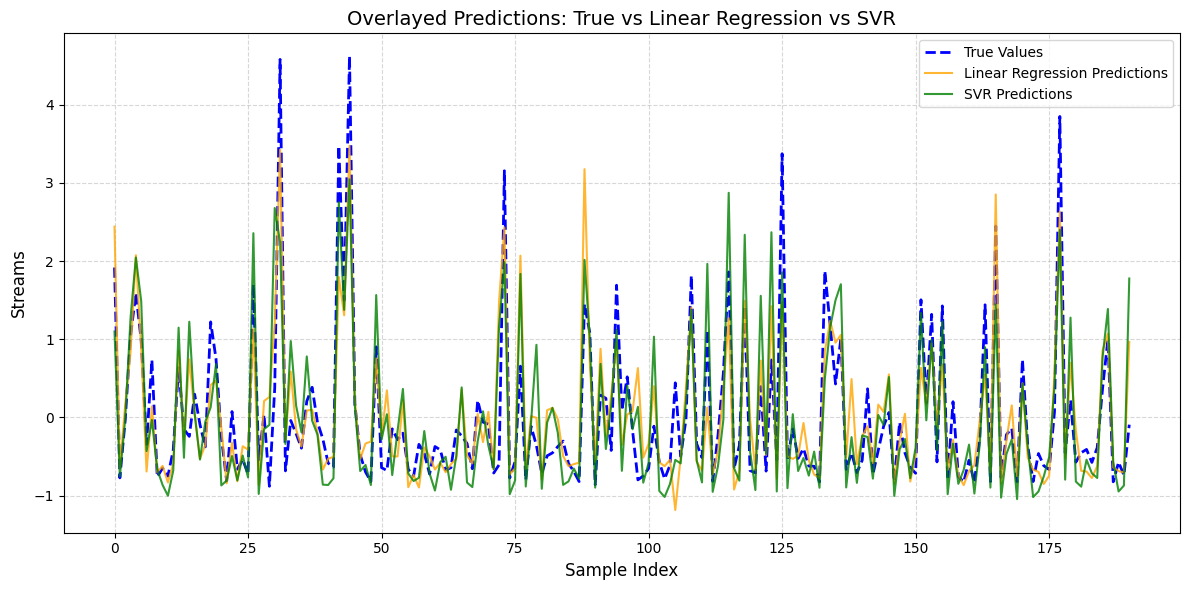

In [249]:
import matplotlib.pyplot as plt

# Extract the true target values for the test data (y_test)
if "streams" in test_data_processed.columns:
    y_test = test_data_processed["streams"]  # True target values for the test set
else:
    raise ValueError("The 'streams' column (True Values) is missing in test data.")

# Linear Regression Predictions
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
test_predictions_lr = lr_model.predict(test_features)

# Support Vector Regression Predictions
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)
test_predictions_svr = svr_model.predict(test_features)

# Plot True Values, Linear Regression Predictions, and SVR Predictions
plt.figure(figsize=(12, 6))

# Plot True Values
plt.plot(range(len(y_test)), y_test, label="True Values", linestyle="--", linewidth=2, color="blue")

# Plot Linear Regression Predictions
plt.plot(range(len(y_test)), test_predictions_lr, label="Linear Regression Predictions", linestyle="-", alpha=0.8, color="orange")

# Plot SVR Predictions
plt.plot(range(len(y_test)), test_predictions_svr, label="SVR Predictions", linestyle="-", alpha=0.8, color="green")

# Add Title and Axis Labels
plt.title("Overlayed Predictions: True vs Linear Regression vs SVR", fontsize=14)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Streams", fontsize=12)

# Add Grid, Legend, and Layout
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(loc="upper right", fontsize=10)
plt.tight_layout()

# Show Plot
plt.show()


This Graph Represents the Performance of models on standardised test data. In regions with sharp peaks (e.g., indices around 30, 40, 80, and 175), both models struggle to capture the magnitude accurately, with SVR showing slightly better alignment in some areas. This suggests that while both models perform decently for average values, SVR might generalize better for variability compared to Linear Regression

# (f) Ethical Issues

Using machine learning to predict streams based on quantifiable song features—such as danceability, energy, and tempo—encourages a formulaic approach to music production. Artists, driven by the pursuit of higher streams, may feel compelled to align their creative process with the patterns identified by the models. This could lead to:

1. Homogenization of Music: A narrow focus on “what works” may result in a loss of diversity and innovation, as artists replicate similar styles, genres, and structures.

2. Stifling Artistic Freedom: Creativity often flourishes when artists experiment with unconventional elements. The reliance on data-driven insights might discourage risk-taking, undermining music as a form of self-expression.

3. Cultural Dilution: Unique cultural sounds and experimental music that fall outside the identified “popular” patterns could be marginalized, diminishing cultural richness in the music industry.

Thus, while machine learning can optimize commercial success, it risks reducing music to a logical, profit-driven process, jeopardizing the artistic soul of the industry.

# (g) Bibliography

References

1. Scikit-learn Documentation
Available at: https://scikit-learn.org/stable/

2. Pandas Documentation
The Pandas Development Team. (2024). Pandas User Guide. Pandas Documentation.
Available at: https://pandas.pydata.org/

3. Numpy Documentation
Available at: https://numpy.org/doc/

4. Matplotlib Documentation
Available at: https://matplotlib.org/stable/

5. Support Vector Machines (SVMs), Corinna Cortes and Vladamir Vapnik
Available at: https://doi.org/10.1007/BF00994018